In this notebook, we just look at avaialble variables in different nc files. We perform basic operations like readind ensemble data, means, plotting. For formal analysis, see other notebooks.

In [1]:
# Load libraries

import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# !pip list

## Global Means

Working with zonally integrated and volume integrated fields, which include global mean T, S, overturning circulaton and meridional heat transport profiles in the North Atlantic.  

1. Heat and salt transport diagnostics for eddy parameterizations are not available. The data has `nan` values.
2. Total Meridional Heat/Salt Transport = Advective Heat/Salt Transport + Diffusive Heat/Salt Transport
3. Total Meridional Heat/Salt Transport = Heat/Salt Transport due to Overturning + Heat/Salt Transport due to Gyres
4. Variability across ensemles is low. 
5. The seaonal variability is seen in overturning strength (and possibly also in heat and salt transport magnitudes)

#### Note 
Divide `sopstadv_atlantic` and `sltovbaro_atlantic` by 1000 to get correct units.

In [ ]:
# Code for combining data

"""
ppdir="/home/users/hkhatri/DePreSys4_Data/Ensemble_Data/2008-az256/"

ds = []

for i in range(0,10):
    
    d = xr.open_mfdataset(ppdir + "r" + str(i+1) + "/onm/*.nc")
    ds.append(d)
    
ds = xr.concat(ds, dim='r')

ds['time'] = ds['time_centered'].astype("datetime64[ns]") # convert cftime to convenient form

save_path="/home/users/hkhatri/DePreSys4_Data/Ensemble_Data/Data_Consolidated/"
save_file = save_path + "2008_diaptr.nc"
ds_save = ds.load()
ds_save.to_netcdf(save_file)

"""

In [2]:
# Read ensemble data for run started in year 2008

ppdir="/home/users/hkhatri/DePreSys4_Data/Ensemble_Data/Data_Consolidated/"
ds = xr.open_dataset(ppdir + "2008_diaptr.nc") 

print(ds)

<xarray.Dataset>
Dimensions:                  (axis_nbounds: 2, deptht: 75, depthw: 75, r: 10, time_counter: 125, x: 1, y: 451)
Coordinates:
  * deptht                   (deptht) float32 0.50576 1.5558553 ... 5902.0576
  * depthw                   (depthw) float32 0.0 1.0239066 ... 5596.249 5800.0
    nav_lat                  (y, x) float32 ...
    nav_lon                  (y, x) float32 ...
    time_centered            (time_counter) object ...
  * time_counter             (time_counter) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
Dimensions without coordinates: axis_nbounds, r, x, y
Data variables:
    deptht_bounds            (r, time_counter, deptht, axis_nbounds) float32 ...
    depthw_bounds            (r, time_counter, depthw, axis_nbounds) float32 ...
    hfbasin_atlantic         (r, time_counter, y, x) float32 ...
    hfbasinpadv_atlantic     (r, time_counter, y, x) float32 ...
    hfbasinpmadv_atlantic    (r, time_counter, y, x) float32 ...
    hfbasinpmdiff_atlantic   (r, time_count

(array([733042., 733773., 734503., 735234., 735964., 736695., 737425.]),
 <a list of 7 Text xticklabel objects>)

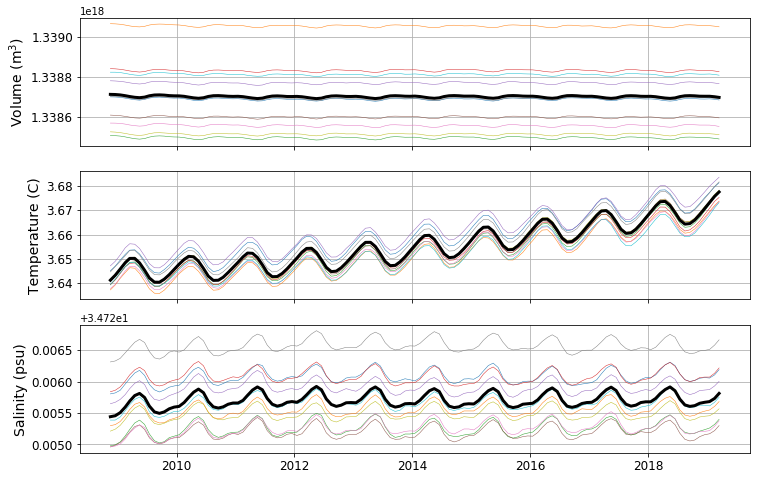

In [4]:
# Global mean temperature, salinity and total ocean volume time series for ensemble runs and their mean.

grid = plt.GridSpec(3, 1, wspace=0.2, hspace=0.2)
fig = plt.figure(figsize=[12,8])

ax = fig.add_subplot(grid[0, 0])
ax.plot(ds.time, ds.scvoltot.transpose('time_counter', 'r'), lw = 0.5)
ax.plot(ds.time, ds.scvoltot.mean('r'), lw = 3, color='k')
ax.set_ylabel(r'Volume (m$^3$)', fontsize=14)
ax.set_xticklabels([])
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

ax = fig.add_subplot(grid[1, 0])
ax.plot(ds.time, ds.thetaoga.transpose('time_counter', 'r'), lw = 0.5)
ax.plot(ds.time, ds.thetaoga.mean('r'), lw = 3, color='k')
ax.set_ylabel(r'Temperature (C)', fontsize=14)
ax.set_xticklabels([])
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

ax = fig.add_subplot(grid[2, 0])
ax.plot(ds.time, ds.soga.transpose('time_counter', 'r'), lw = 0.5)
ax.plot(ds.time, ds.soga.mean('r'), lw = 3, color='k')
ax.set_ylabel(r'Salinity (psu)', fontsize=14)
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

/opt/jaspy/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


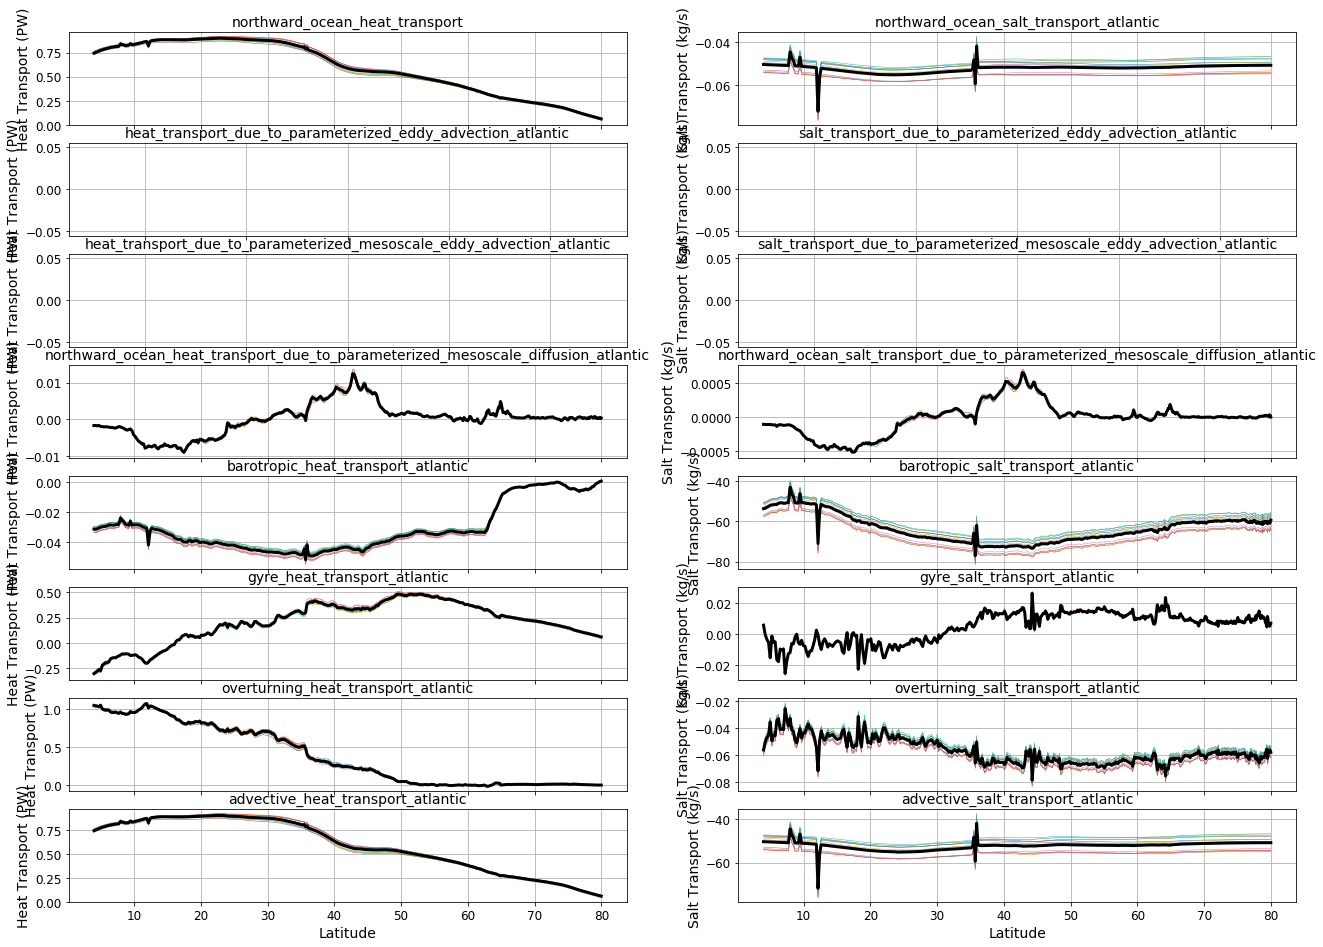

In [5]:
# Meridional heat transport and salt transport (titles should be for salt transport on right panels)

var_heat = ['hfbasin_atlantic', 'hfbasinpadv_atlantic', 'hfbasinpmadv_atlantic', 'hfbasinpmdiff_atlantic',
            'hfovbaro_atlantic', 'hfovgyre_atlantic', 'hfovovrt_atlantic', 'sophtadv_atlantic']

var_salt = ['sltbasin_atlantic', 'sltbasinpadv_atlantic', 'sltbasinpmadv_atlantic', 'sltbasinpmdiff_atlantic',
            'sltovbaro_atlantic', 'sltovgyre_atlantic', 'sltovovrt_atlantic', 'sopstadv_atlantic']

grid = plt.GridSpec(8, 2, wspace=0.2, hspace=0.2)
fig = plt.figure(figsize=[22,16])

for i in range(0, len(var_heat)):
    
    ax = fig.add_subplot(grid[i, 0])
    ax.plot(ds.nav_lat.isel(x=0), ds[var_heat[i]].mean(['x', 'time_counter']).transpose('y', 'r'), lw = 0.5)
    ax.plot(ds.nav_lat.isel(x=0), ds[var_heat[i]].mean(['x', 'time_counter', 'r']), lw = 3.0, color='k')
    ax.set_title(ds[var_heat[i]].standard_name, fontsize=14)
    ax.set_ylabel(r'Heat Transport (PW)', fontsize=14)
    if(i < len(var_heat) - 1):
        ax.set_xticklabels([])
    else:
        ax.set_xlabel('Latitude', fontsize=14)
    ax.grid()
    plt.yticks(fontsize = 12)
    plt.xticks(fontsize = 12)
    
for i in range(0, len(var_salt)):
    
    ax = fig.add_subplot(grid[i, 1])
    ax.plot(ds.nav_lat.isel(x=0), ds[var_salt[i]].mean(['x', 'time_counter']).transpose('y', 'r'), lw = 0.5)
    ax.plot(ds.nav_lat.isel(x=0), ds[var_salt[i]].mean(['x', 'time_counter', 'r']), lw = 3.0, color='k')
    ax.set_title(ds[var_salt[i]].standard_name, fontsize=14)
    ax.set_ylabel(r'Salt Transport (kg/s)', fontsize=14)
    if(i < len(var_heat) - 1):
        ax.set_xticklabels([])
    else:
        ax.set_xlabel('Latitude', fontsize=14)
    ax.grid()
    plt.yticks(fontsize = 12)
    plt.xticks(fontsize = 12)

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 <a list of 10 Text xticklabel objects>)

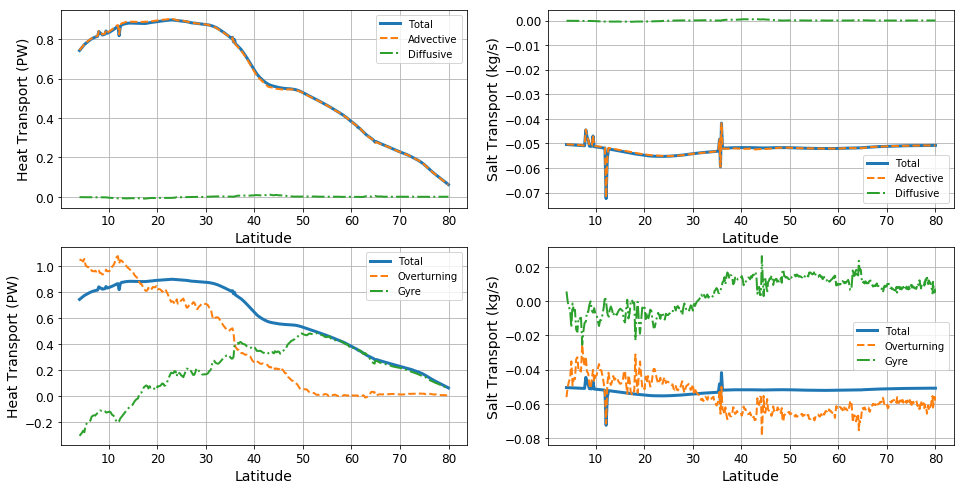

In [6]:
grid = plt.GridSpec(2, 2, wspace=0.2, hspace=0.2)
fig = plt.figure(figsize=[16,8])

ax = fig.add_subplot(grid[0, 0])
ax.plot(ds.nav_lat.isel(x=0), ds['hfbasin_atlantic'].mean(['x', 'time_counter', 'r']), lw = 3.0)
ax.plot(ds.nav_lat.isel(x=0), ds['sophtadv_atlantic'].mean(['x', 'time_counter', 'r']), ls = '--', lw = 2.0)
ax.plot(ds.nav_lat.isel(x=0), ds['hfbasinpmdiff_atlantic'].mean(['x', 'time_counter', 'r']), ls = '-.', lw = 2.0)
ax.set_ylabel(r'Heat Transport (PW)', fontsize=14)
ax.set_xlabel('Latitude', fontsize=14)
ax.grid()
ax.legend(['Total', 'Advective', 'Diffusive'])
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

ax = fig.add_subplot(grid[1, 0])
ax.plot(ds.nav_lat.isel(x=0), ds['hfbasin_atlantic'].mean(['x', 'time_counter', 'r']), lw = 3.0)
ax.plot(ds.nav_lat.isel(x=0), ds['hfovovrt_atlantic'].mean(['x', 'time_counter', 'r']), ls = '--', lw = 2.0)
ax.plot(ds.nav_lat.isel(x=0), ds['hfovgyre_atlantic'].mean(['x', 'time_counter', 'r']), ls = '-.', lw = 2.0)
#ax.plot(ds.nav_lat.isel(x=0), (ds['hfovovrt_atlantic'] + ds['hfovgyre_atlantic']).mean(['x', 'time_counter', 'r']), ls = '-.', lw = 2.0)
ax.set_ylabel(r'Heat Transport (PW)', fontsize=14)
ax.set_xlabel('Latitude', fontsize=14)
ax.grid()
ax.legend(['Total', 'Overturning', 'Gyre'])
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)


ax = fig.add_subplot(grid[0, 1])
ax.plot(ds.nav_lat.isel(x=0), ds['sltbasin_atlantic'].mean(['x', 'time_counter', 'r']), lw = 3.0)
ax.plot(ds.nav_lat.isel(x=0), 0.001*ds['sopstadv_atlantic'].mean(['x', 'time_counter', 'r']), ls = '--', lw = 2.0)
ax.plot(ds.nav_lat.isel(x=0), ds['sltbasinpmdiff_atlantic'].mean(['x', 'time_counter', 'r']), ls = '-.', lw = 2.0)
ax.set_ylabel(r'Salt Transport (kg/s)', fontsize=14)
ax.set_xlabel('Latitude', fontsize=14)
ax.grid()
ax.legend(['Total', 'Advective', 'Diffusive'])
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

ax = fig.add_subplot(grid[1, 1])
ax.plot(ds.nav_lat.isel(x=0), ds['sltbasin_atlantic'].mean(['x', 'time_counter', 'r']), lw = 3.0)
ax.plot(ds.nav_lat.isel(x=0), ds['sltovovrt_atlantic'].mean(['x', 'time_counter', 'r']), ls = '--', lw = 2.0)
ax.plot(ds.nav_lat.isel(x=0), ds['sltovgyre_atlantic'].mean(['x', 'time_counter', 'r']), ls = '-.', lw = 2.0)
#ax.plot(ds.nav_lat.isel(x=0), (ds['hfovovrt_atlantic'] + ds['hfovgyre_atlantic']).mean(['x', 'time_counter', 'r']), ls = '-.', lw = 2.0)
ax.set_ylabel(r'Salt Transport (kg/s)', fontsize=14)
ax.set_xlabel('Latitude', fontsize=14)
ax.grid()
ax.legend(['Total', 'Overturning', 'Gyre'])
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

#plt.plot(ds.nav_lat.isel(x=0), ds[var_heat[1]].mean(['x', 'time_counter', 'r']).transpose('y', 'r'), lw = 0.5);

Text(0.5, 1.0, 'Overturning (Sv) at different Lats')

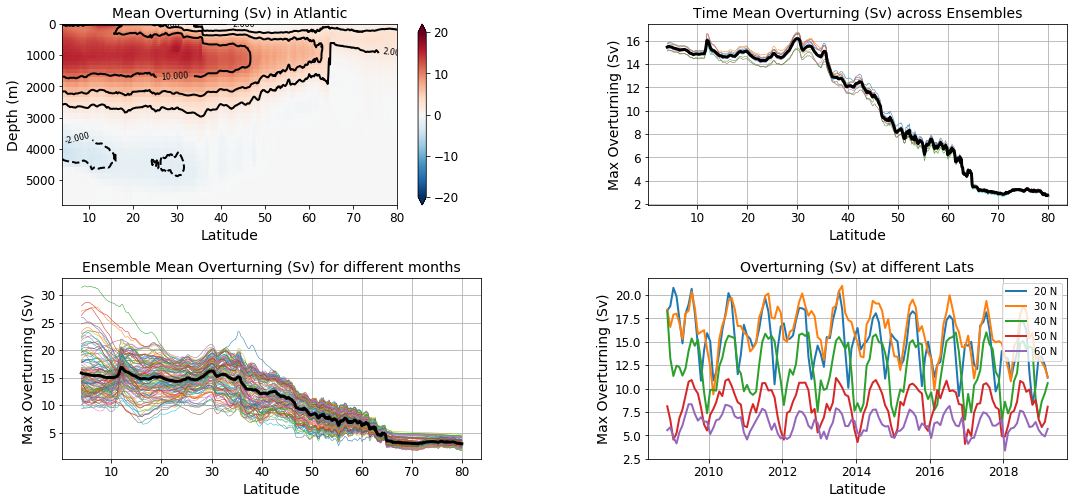

In [7]:
psi_lev = [-10, -5, -2, 2, 5, 10] 

grid = plt.GridSpec(2, 2, wspace=0.4, hspace=0.4)
fig = plt.figure(figsize=[18,8])

ax = fig.add_subplot(grid[0, 0])
p = ax.pcolor(ds.nav_lat.isel(x=0), ds.depthw, ds.zomsfatl.mean(['x', 'time_counter', 'r']), vmin=-20, vmax=20, cmap='RdBu_r')
cb = plt.colorbar(p, ax=ax, extend='both')
cb.ax.tick_params(labelsize=12)
contours = ax.contour(ds.nav_lat.isel(x=0), ds.depthw, ds.zomsfatl.mean(['x', 'time_counter', 'r']), psi_lev, colors='black', linewidths=2)
ax.clabel(contours, inline=True, fontsize=8)
ax.set_ylabel('Depth (m)', fontsize=14)
ax.set_xlabel('Latitude', fontsize=14)
plt.gca().invert_yaxis()
plt.title('Mean Overturning (Sv) in Atlantic', fontsize=14)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

psi_max = ds.zomsfatl.mean(['x', 'time_counter']).max(dim='depthw')
ax = fig.add_subplot(grid[0, 1])
ax.plot(ds.nav_lat.isel(x=0), psi_max.transpose('y', 'r'), lw = 0.5)
ax.plot(ds.nav_lat.isel(x=0), psi_max.mean(['r']), lw = 3.0, color='k')
ax.set_ylabel(r'Max Overturning (Sv)', fontsize=14)
ax.set_xlabel('Latitude', fontsize=14)
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.title('Time Mean Overturning (Sv) across Ensembles', fontsize=14)

psi_max = ds.zomsfatl.mean(['x', 'r']).max(dim='depthw')
ax = fig.add_subplot(grid[1, 0])
ax.plot(ds.nav_lat.isel(x=0), psi_max.transpose('y', 'time_counter'), lw = 0.5)
ax.plot(ds.nav_lat.isel(x=0), psi_max.mean(['time_counter']), lw = 3.0, color='k')
ax.set_ylabel(r'Max Overturning (Sv)', fontsize=14)
ax.set_xlabel('Latitude', fontsize=14)
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.title('Ensemble Mean Overturning (Sv) for different months', fontsize=14)


psi_max = ds.zomsfatl.mean(['x', 'r']).max(dim='depthw')
psi_max = psi_max.assign_coords(y=ds.nav_lat.isel(x=0))
psi_max = psi_max.sel(y=[20., 30., 40., 50., 60.], method="nearest")
ax = fig.add_subplot(grid[1, 1])
ax.plot(ds.time, psi_max.transpose('time_counter','y'), lw = 2.)
ax.set_ylabel(r'Max Overturning (Sv)', fontsize=14)
ax.set_xlabel('Latitude', fontsize=14)
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
ax.legend(['20 N', '30 N', '40 N', '50 N', '60 N'])
plt.title('Overturning (Sv) at different Lats', fontsize=14)

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 <a list of 10 Text xticklabel objects>)

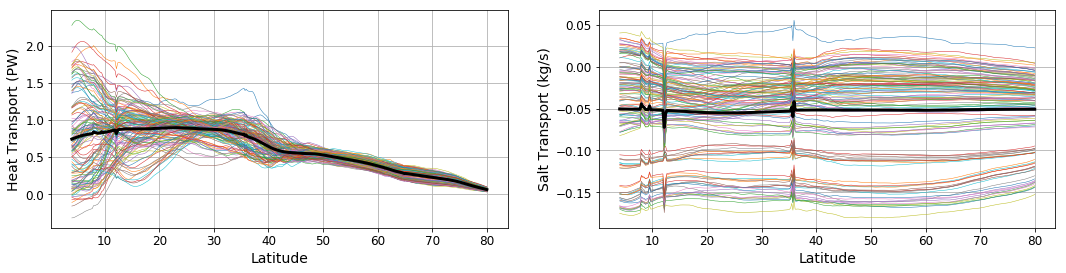

In [15]:
grid = plt.GridSpec(1, 2, wspace=0.2, hspace=0.2)
fig = plt.figure(figsize=[18,4])

ax = fig.add_subplot(grid[0, 0])
ax.plot(ds.nav_lat.isel(x=0), ds['hfbasin_atlantic'].mean(['x', 'r']).transpose('y', 'time_counter'), lw = 0.5)
ax.plot(ds.nav_lat.isel(x=0), ds['hfbasin_atlantic'].mean(['x', 'time_counter', 'r']), lw = 3.0, color='k')
ax.set_ylabel(r'Heat Transport (PW)', fontsize=14)
ax.set_xlabel('Latitude', fontsize=14)
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

ax = fig.add_subplot(grid[0, 1])
ax.plot(ds.nav_lat.isel(x=0), ds['sltbasin_atlantic'].mean(['x', 'r']).transpose('y', 'time_counter'), lw = 0.5)
ax.plot(ds.nav_lat.isel(x=0), ds['sltbasin_atlantic'].mean(['x', 'time_counter', 'r']), lw = 3.0, color ='k')
ax.set_ylabel(r'Salt Transport (kg/s)', fontsize=14)
ax.set_xlabel('Latitude', fontsize=14)
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

In [30]:
var_heat = ['hfbasin_atlantic', 'hfbasinpadv_atlantic', 'hfbasinpmadv_atlantic', 'hfbasinpmdiff_atlantic',
            'hfovbaro_atlantic', 'hfovgyre_atlantic', 'hfovovrt_atlantic', 'sophtadv_atlantic']

var_salt = ['sltbasin_atlantic', 'sltbasinpadv_atlantic', 'sltbasinpmadv_atlantic', 'sltbasinpmdiff_atlantic',
            'sltovbaro_atlantic', 'sltovgyre_atlantic', 'sltovovrt_atlantic', 'sopstadv_atlantic']

for var in var_heat:
    
    print(ds[var].standard_name)
          
for var in var_salt:
    
    print(ds[var].standard_name)

northward_ocean_heat_transport
heat_transport_due_to_parameterized_eddy_advection_atlantic
heat_transport_due_to_parameterized_mesoscale_eddy_advection_atlantic
northward_ocean_heat_transport_due_to_parameterized_mesoscale_diffusion_atlantic
barotropic_heat_transport_atlantic
gyre_heat_transport_atlantic
overturning_heat_transport_atlantic
advective_heat_transport_atlantic
northward_ocean_salt_transport_atlantic
salt_transport_due_to_parameterized_eddy_advection_atlantic
salt_transport_due_to_parameterized_mesoscale_eddy_advection_atlantic
northward_ocean_salt_transport_due_to_parameterized_mesoscale_diffusion_atlantic
barotropic_salt_transport_atlantic
gyre_salt_transport_atlantic
overturning_salt_transport_atlantic
advective_salt_transport_atlantic


Text(0.5, 1.0, 'Overturning (Sv) at different Lats')

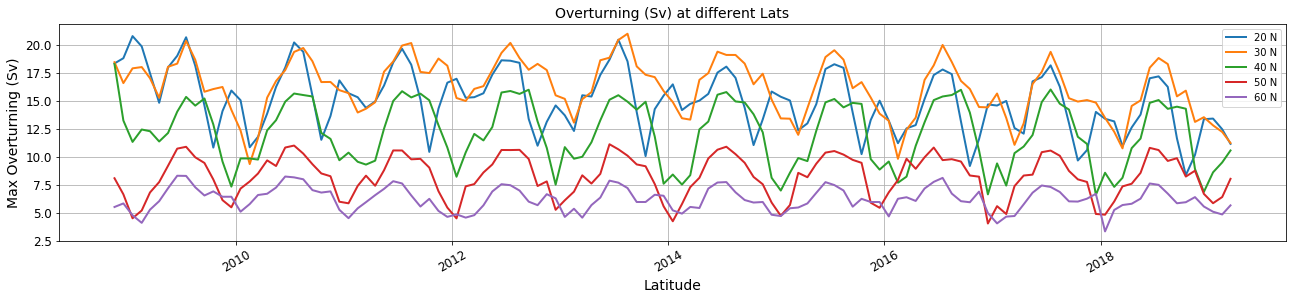

In [12]:
psi_lev = [-10, -5, -2, 2, 5, 10] 

grid = plt.GridSpec(1, 1, wspace=0.4, hspace=0.4)
fig = plt.figure(figsize=[22,4])

psi_max = ds.zomsfatl.mean(['x', 'r']).max(dim='depthw')
psi_max = psi_max.assign_coords(y=ds.nav_lat.isel(x=0))
psi_max = psi_max.sel(y=[20., 30., 40., 50., 60.], method="nearest")
ax = fig.add_subplot(grid[0, 0])
ax.plot(ds.time, psi_max.transpose('time_counter','y'), lw = 2.)
ax.set_ylabel(r'Max Overturning (Sv)', fontsize=14)
ax.set_xlabel('Latitude', fontsize=14)
ax.grid()
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12, rotation = 30)
ax.legend(['20 N', '30 N', '40 N', '50 N', '60 N'])
plt.title('Overturning (Sv) at different Lats', fontsize=14)

#### Monthly and Seasonal Climatology

From glitter discussion forum. 

`ds.resample(time=‘QS-DEC)` for seasons starting in DJF, MAM (traditional climatological seasons) and `ds.resample(time=‘QS-JAN’)` for JFM, AMJ, etc.

`.groupby()` groups by labels and averages over them. For `.groupby(‘time.year’)`, the label is the given year (1990, 1991, …). For `.groupby(‘time.season’)`, the label is the given season (DJF, MAM, JJA, SON) so it returns the average over that season. Same as the `.groupby(‘time.month’)` which would give you the J, F, M, and so on climatological average over the time period. Resample coarsens from your monthly resolution to 3-month averages.

<xarray.DataArray 'zomsfatl' (month: 12, y: 4)>
array([[14.541299,  9.310318,  5.496269,  4.657444],
       [13.098739,  9.116581,  6.507944,  5.164492],
       [13.189381,  9.915893,  8.019495,  5.532937],
       [14.986951, 11.103376,  8.239079,  5.976479],
       [17.133625, 12.608539,  9.131136,  6.922093],
       [18.476797, 15.0043  , 10.705669,  7.824817],
       [19.71058 , 15.573878, 10.61684 ,  7.75649 ],
       [19.040188, 14.993032, 10.08486 ,  7.03265 ],
       [16.970741, 15.088537,  9.52821 ,  6.089659],
       [16.595572, 13.681618,  8.447184,  6.187271],
       [16.403439, 11.606052,  7.562311,  6.274039],
       [15.280932,  8.500324,  5.606019,  5.749145]], dtype=float32)
Coordinates:
    nav_lat  (y) float32 ...
    nav_lon  (y) float32 ...
  * y        (y) float32 30.028221 40.09002 50.036243 60.016815
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12


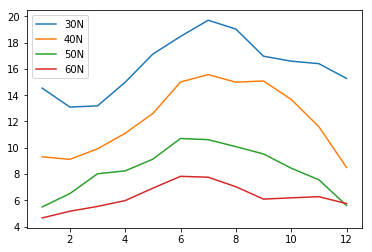

In [21]:
# Monthly Climatology Overturning and anomaly

psi_max = ds.zomsfatl.mean(['x', 'r']).max(dim='depthw')
psi_max = psi_max.assign_coords(y=ds.nav_lat.isel(x=0))
psi_max = psi_max.sel(y=[30., 40., 50., 60.], method="nearest")

psi_clim = (psi_max).groupby('time_centered.month').mean('time_counter')

print(psi_clim)

plt.plot(psi_clim.month, psi_clim)
plt.legend(['30N', '40N', '50N' ,'60N'])

<xarray.DataArray 'zomsfatl' (time_counter: 125, y: 4)>
array([[ 2.049784,  6.671446,  0.541194, -0.734064],
       [ 1.309129,  4.751306,  1.06498 ,  0.108852],
       [ 3.365155,  2.035019, -0.963386,  0.143796],
       ...,
       [-1.717906, -0.679068,  0.381422,  0.459512],
       [-0.866419,  0.401025, -0.078129, -0.290447],
       [-1.9398  ,  0.666183,  0.032217,  0.152396]], dtype=float32)
Coordinates:
    nav_lat        (y) float32 30.028221 40.09002 50.036243 60.016815
    nav_lon        (y) float32 0.0 0.0 0.0 0.0
  * y              (y) float32 30.028221 40.09002 50.036243 60.016815
    time_centered  (time_counter) object 2008-11-16 00:00:00 ... 2019-03-16 00:00:00
  * time_counter   (time_counter) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    month          (time_counter) int64 11 12 1 2 3 4 5 6 ... 8 9 10 11 12 1 2 3


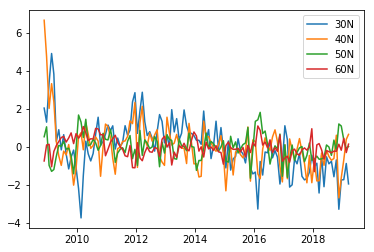

In [22]:
psi_anom = psi_max.groupby("time_centered.month") - psi_clim
print(psi_anom)

plt.plot(ds.time, psi_anom)
plt.legend(['30N', '40N', '50N' ,'60N'])

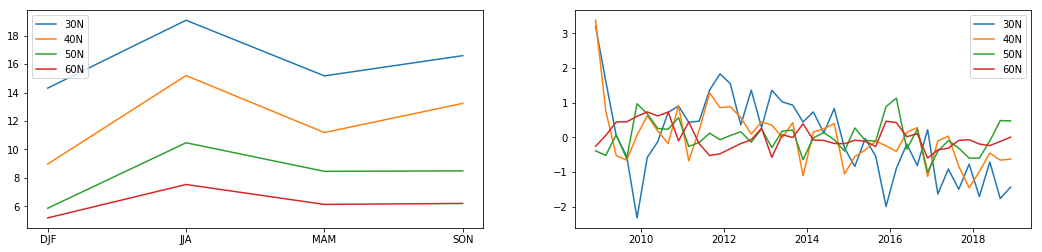

In [63]:
# Seaonal Climatology Overturning and anomaly

psi_max = ds.zomsfatl.mean(['x', 'r']).max(dim='depthw')
psi_max = psi_max.assign_coords(y=ds.nav_lat.isel(x=0), time_counter=ds.time)
psi_max = psi_max.sel(y=[30., 40., 50., 60.], method="nearest").isel(time_counter=slice(1,124))

psi_clim = (psi_max).groupby('time_centered.season').mean('time_counter')

psi_resam = psi_max.resample(time_counter='QS-DEC').mean('time_counter')

psi_anom = psi_resam.groupby("time_counter.season") - psi_clim

fig = plt.figure(figsize=[18,4])
plt.subplot(1,2,1)
plt.plot(psi_clim.season, psi_clim)
plt.legend(['30N', '40N', '50N' ,'60N'])

plt.subplot(1,2,2)
plt.plot(psi_anom.time_counter, psi_anom)
plt.legend(['30N', '40N', '50N' ,'60N'])

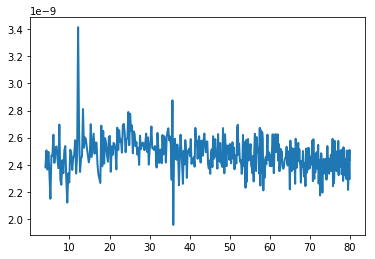

In [13]:
#plt.plot(ds.nav_lat.isel(x=0), ( ds['sopstadv_atlantic'] - ds['sltovbaro_atlantic']).mean(['x', 'time_counter', 'r']), ls = '--', lw = 2.0)
#plt.plot(ds.nav_lat.isel(x=0), ds['sltbasinpmdiff_atlantic'].mean(['x', 'time_counter', 'r']), ls = '-.', lw = 2.0)
plt.plot(ds.nav_lat.isel(x=0), (ds['sltbasin_atlantic'] - ds['sopstadv_atlantic']*0.001 - ds['sltbasinpmdiff_atlantic']).mean(['x', 'time_counter', 'r']), ls = '-', lw = 2.0)

## Ocean Data - Surface 2D Fields

In [2]:
# Code for combining data

"""
ppdir="/badc/cmip6/data/CMIP6/DCPP/MOHC/HadGEM3-GC31-MM/dcppA-hindcast/"

year = 2008
var_list = ['volo', 'hfds', 'mlotst', 'tos', 'sos', 'zos']

ds = []

for i in range(0,10):
    
    ds1 = []
    
    for var in var_list:
        
        var_path = "s" + str(year) +"-r" + str(i+1) + "i1p1f2/Omon/" + var + "/gn/files/d20200417/"
    
        d = xr.open_mfdataset(ppdir + var_path + "*.nc")
        
        ds1.append(d)
        
    ds1 = xr.merge(ds1)
    
    ds.append(ds1)
    
ds = xr.concat(ds, dim='r')

ds = ds.drop(['vertices_latitude', 'vertices_longitude'])
ds = ds.isel(i=slice(749,1199), j = slice(699, 1149))

"""

#save_path="/home/users/hkhatri/DePreSys4_Data/Ensemble_Data/Data_Consolidated/"
#save_file = save_path + "2008_diaptr.nc"
#ds_save = ds.load()
#ds_save.to_netcdf(save_file)

ppdir="/home/users/hkhatri/DePreSys4_Data/Ensemble_Data/Data_Consolidated/"

var_list = ['hfds', 'mlotst', 'tos', 'sos', 'zos']

year = 2008

ds = []

for var in var_list:

    d = xr.open_dataset(ppdir + str(year) + "_" + var + ".nc") 
    ds.append(d)

ds = xr.merge(ds)
print(ds)

<xarray.Dataset>
Dimensions:    (bnds: 2, i: 450, j: 450, r: 10, time: 125)
Coordinates:
  * j          (j) int32 699 700 701 702 703 704 ... 1144 1145 1146 1147 1148
  * i          (i) int32 749 750 751 752 753 754 ... 1194 1195 1196 1197 1198
    latitude   (j, i) float32 3.9967546 3.9967546 3.9967546 ... 73.3409 73.23673
    longitude  (j, i) float32 -99.75 -99.5 -99.25 ... 51.24366 51.40632
  * time       (time) object 2008-11-16 00:00:00 ... 2019-03-16 00:00:00
Dimensions without coordinates: bnds, r
Data variables:
    time_bnds  (r, time, bnds) float64 5.718e+04 5.721e+04 ... 6.093e+04
    hfds       (r, time, j, i) float32 ...
    mlotst     (r, time, j, i) float32 ...
    tos        (r, time, j, i) float32 ...
    sos        (r, time, j, i) float32 ...
    zos        (r, time, j, i) float32 ...


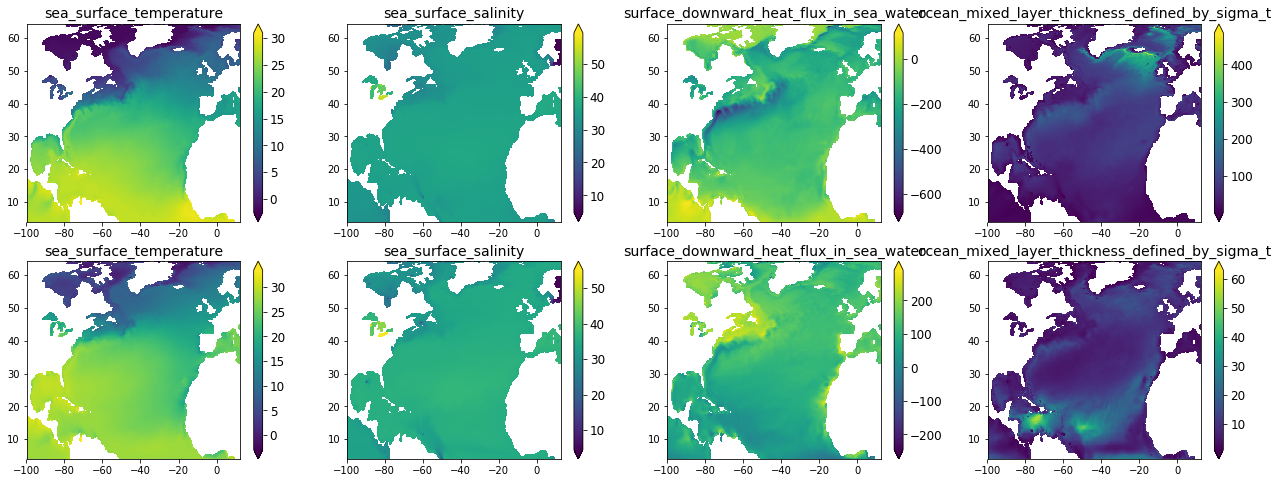

In [21]:
grid = plt.GridSpec(2, 4, wspace=0.2, hspace=0.2)
fig = plt.figure(figsize=[22,8])

var_list = ['tos', 'sos', 'hfds', 'mlotst']

for i in range(0,4):
    ax = fig.add_subplot(grid[0, i])
    p = ax.pcolor(ds.longitude.isel(j=0), ds.latitude.isel(i=0), (ds[var_list[i]].isel(time=1)).mean('r'))
    cb = plt.colorbar(p, ax=ax, extend='both')
    cb.ax.tick_params(labelsize=12)
    plt.title(ds[var_list[i]].standard_name, fontsize=14)
    
for i in range(0,4):
    ax = fig.add_subplot(grid[1, i])
    p = ax.pcolor(ds.longitude.isel(j=0), ds.latitude.isel(i=0), (ds[var_list[i]].isel(time=8)).mean('r'))
    cb = plt.colorbar(p, ax=ax, extend='both')
    cb.ax.tick_params(labelsize=12)
    plt.title(ds[var_list[i]].standard_name, fontsize=14)


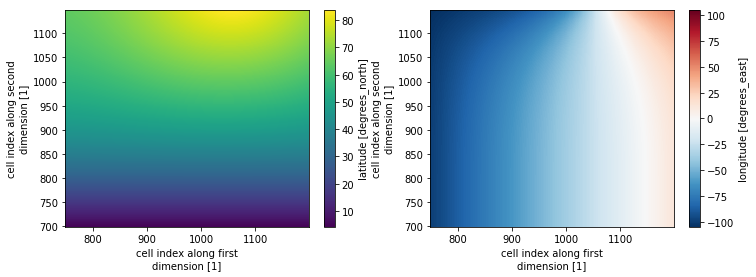

In [22]:
grid = plt.GridSpec(1, 2, wspace=0.2, hspace=0.2)
fig = plt.figure(figsize=[12,4])

ax = fig.add_subplot(grid[0, 0])
ds.latitude.plot()

ax = fig.add_subplot(grid[0, 1])
ds.longitude.plot()

In [20]:
# monthly climatology remove
hfds_clim = (ds['hfds'].mean('r')).groupby('time.month').mean('time')

/opt/jaspy/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


/opt/jaspy/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


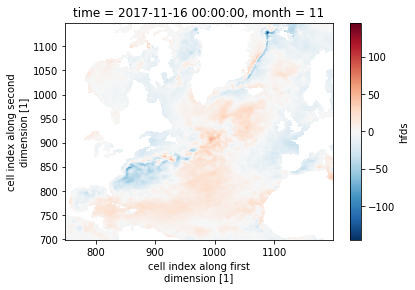

In [34]:
(ds['hfds'].isel(time=108).mean('r') - hfds_clim.isel(month=10)).plot()

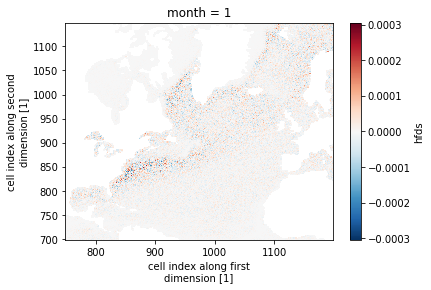

In [21]:
tmp = ds['hfds'].isel(time=slice(2,125,12)).mean(['r', 'time'])
(tmp - hfds_clim.isel(month=0)).plot()

In [16]:
print(hfds_clim)

<xarray.DataArray 'hfds' (month: 12, j: 450, i: 450)>
array([[[  54.714245,   54.723904, ...,         nan,         nan],
        [  51.3838  ,   51.393734, ...,         nan,         nan],
        ...,
        [        nan,         nan, ..., -303.13727 , -284.36267 ],
        [        nan,         nan, ..., -294.9766  , -258.11166 ]],

       [[  85.77092 ,   85.45273 , ...,         nan,         nan],
        [  82.94998 ,   82.630066, ...,         nan,         nan],
        ...,
        [        nan,         nan, ..., -361.2734  , -338.98047 ],
        [        nan,         nan, ..., -360.01266 , -294.4153  ]],

       ...,

       [[  12.826205,   13.261579, ...,         nan,         nan],
        [  15.759909,   16.205997, ...,         nan,         nan],
        ...,
        [        nan,         nan, ..., -183.78917 , -177.1701  ],
        [        nan,         nan, ..., -180.18584 , -170.39386 ]],

       [[  41.81114 ,   41.914112, ...,         nan,         nan],
        [  41.274

In [18]:
# time series (month and season)

ds["time.season"]
# ds["time.month"] ds["time.year"]

<xarray.DataArray 'season' (time: 125)>
array(['SON', 'DJF', 'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA', 'JJA', 'JJA',
       'SON', 'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA',
       'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM', 'MAM',
       'MAM', 'JJA', 'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF', 'DJF', 'DJF',
       'MAM', 'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF',
       'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON', 'SON',
       'SON', 'DJF', 'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA', 'JJA', 'JJA',
       'SON', 'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA',
       'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF', 'DJF', 'DJF', 'MAM', 'MAM',
       'MAM', 'JJA', 'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF', 'DJF', 'DJF',
       'MAM', 'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON', 'SON', 'SON', 'DJF',
       'DJF', 'DJF', 'MAM', 'MAM', 'MAM', 'JJA', 'JJA', 'JJA', 'SON', 'SON',
       'SON', 'DJF', 'DJF', 'DJF', '

In [26]:
# Global Volume

ppdir="/badc/cmip6/data/CMIP6/DCPP/MOHC/HadGEM3-GC31-MM/dcppA-hindcast/"

year = 2008
var = 'volo'

ds = []

for year in range(1960,2017):
        
    var_path = "s" + str(year) +"-r" + str(1) + "i1p1f2/Omon/" + var + "/gn/files/d20200417/"
    
    d = xr.open_mfdataset(ppdir + var_path + "*.nc")
        
    ds.append(d)
    
#ds = xr.concat(ds, dim='year')

In [27]:
print(ds[0])

<xarray.Dataset>
Dimensions:    (bnds: 2, time: 125)
Coordinates:
  * time       (time) object 1960-11-16 00:00:00 ... 1971-03-16 00:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) float64 dask.array<shape=(125, 2), chunksize=(2, 2)>
    volo       (time) float32 dask.array<shape=(125,), chunksize=(2,)>
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            DCPP
    branch_method:          no parent
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2020-11-18T15:37:13Z
    cv_version:             6.2.54.1
    data_specs_version:     01.00.29
    experiment:             hindcast initialized based on observations and us...
    experiment_id:          dcppA-hindcast
    forcing_index:          2
    frequency:              mon
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.MOHC.HadGEM3...
    grid:                   N216
    grid_label:             gn
    history

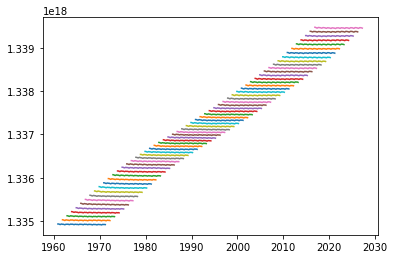

In [28]:
for i in range(0,57):
    
    plt.plot(ds[i]['time'].astype("datetime64[ns]"), ds[i]['volo'])

In [35]:
print(ds1.latitude, ds1.longitude)

<xarray.DataArray 'latitude' (j: 450, i: 450)>
array([[ 3.996755,  3.996755,  3.996755, ...,  3.996755,  3.996755,  3.996755],
       [ 4.246108,  4.246108,  4.246108, ...,  4.246108,  4.246108,  4.246108],
       [ 4.495381,  4.495381,  4.495381, ...,  4.495381,  4.495381,  4.495381],
       ...,
       [64.21774 , 64.23563 , 64.25423 , ..., 73.34649 , 73.243   , 73.139404],
       [64.25269 , 64.27034 , 64.28872 , ..., 73.39617 , 73.29238 , 73.1885  ],
       [64.28731 , 64.304726, 64.32287 , ..., 73.44498 , 73.3409  , 73.23673 ]],
      dtype=float32)
Coordinates:
  * j          (j) int32 699 700 701 702 703 704 ... 1144 1145 1146 1147 1148
  * i          (i) int32 749 750 751 752 753 754 ... 1194 1195 1196 1197 1198
    latitude   (j, i) float32 3.9967546 3.9967546 3.9967546 ... 73.3409 73.23673
    longitude  (j, i) float32 -99.75 -99.5 -99.25 ... 51.24366 51.40632
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    bounds:  

In [17]:
ppdir="/badc/cmip6/data/CMIP6/DCPP/MOHC/HadGEM3-GC31-MM/dcppA-hindcast/"

year = 2008
var_list = ['volo', 'hfds', 'mlotst', 'tos', 'sos', 'zos']

for i in range(0,1):
    
    ds1 = []
    
    for var in var_list:
        
        var_path = "s" + str(year) +"-r" + str(i+1) + "i1p1f2/Omon/" + var + "/gn/files/d20200417/"
    
        d = xr.open_mfdataset(ppdir + var_path + "*.nc")
        
        ds1.append(d)
        
    ds1 = xr.merge(ds1)

print(ds1)

<xarray.Dataset>
Dimensions:             (bnds: 2, i: 1440, j: 1205, time: 125, vertices: 4)
Coordinates:
  * time                (time) object 2008-11-16 00:00:00 ... 2019-03-16 00:00:00
  * j                   (j) int32 0 1 2 3 4 5 ... 1199 1200 1201 1202 1203 1204
  * i                   (i) int32 0 1 2 3 4 5 ... 1434 1435 1436 1437 1438 1439
    latitude            (j, i) float32 -89.4875 -89.4875 ... 50.019047 50.0
    longitude           (j, i) float32 73.0 73.25 73.5 73.75 ... 73.0 73.0 73.0
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) float64 dask.array<shape=(125, 2), chunksize=(2, 2)>
    volo                (time) float32 dask.array<shape=(125,), chunksize=(2,)>
    vertices_latitude   (time, j, i, vertices) float32 dask.array<shape=(125, 1205, 1440, 4), chunksize=(2, 1205, 1440, 4)>
    vertices_longitude  (time, j, i, vertices) float32 dask.array<shape=(125, 1205, 1440, 4), chunksize=(2, 1205, 1440, 4)>
    hfds       

In [24]:
ds.nbytes/1e9

4.35189568

In [3]:
ppdir="/badc/cmip6/data/CMIP6/DCPP/MOHC/HadGEM3-GC31-MM/dcppA-hindcast/"

var="s2008-r1i1p1f2/Omon/uo/gn/files/d20200417/"

d = xr.open_mfdataset(ppdir + var + "*.nc")

print(d)

<xarray.Dataset>
Dimensions:             (bnds: 2, i: 1440, j: 1205, lev: 75, time: 125, vertices: 4)
Coordinates:
  * lev                 (lev) float64 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
  * j                   (j) int32 0 1 2 3 4 5 ... 1199 1200 1201 1202 1203 1204
  * i                   (i) int32 0 1 2 3 4 5 ... 1434 1435 1436 1437 1438 1439
    latitude            (j, i) float32 -89.484375 -89.484375 ... 49.99881
    longitude           (j, i) float32 73.125 73.375 73.625 ... 73.0 73.0 73.0
  * time                (time) object 2008-11-16 00:00:00 ... 2019-03-16 00:00:00
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) float64 dask.array<shape=(125, 2), chunksize=(2, 2)>
    lev_bnds            (time, lev, bnds) float64 dask.array<shape=(125, 75, 2), chunksize=(2, 75, 2)>
    vertices_latitude   (time, j, i, vertices) float32 dask.array<shape=(125, 1205, 1440, 4), chunksize=(2, 1205, 1440, 4)>
    vertices_longitude  (time

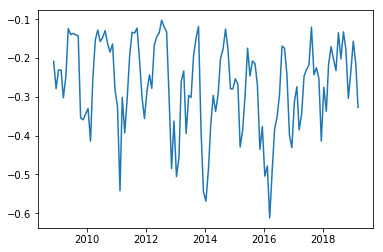

In [11]:
plt.plot(d['time'].astype("datetime64[ns]"), d.uo.isel(lev=0,j=1000,i=1000))

## Atmospheric Data

In [ ]:
ppdir="/badc/cmip6/data/CMIP6/DCPP/MOHC/HadGEM3-GC31-MM/dcppA-hindcast/"

year = 2008
var_list = ['volo', 'hfds', 'mlotst', 'tos', 'sos', 'zos']

ds = []

for i in range(0,10):
    
    ds1 = []
    
    for var in var_list:
        
        var_path = "s" + str(year) +"-r" + str(i+1) + "i1p1f2/Omon/" + var + "/gn/files/d20200417/"
    
        d = xr.open_mfdataset(ppdir + var_path + "*.nc")
        
        ds1.append(d)
        
    ds1 = xr.merge(ds1)
    
    ds.append(ds1)
    
ds = xr.concat(ds, dim='r')

In [3]:
ppdir="/badc/cmip6/data/CMIP6/DCPP/MOHC/HadGEM3-GC31-MM/dcppA-hindcast/"

var="s2008-r1i1p1f2/Amon/tauu/gn/files/d20200417/"

d = xr.open_mfdataset(ppdir + var + "*.nc")

print(d)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 324, lon: 432, time: 125)
Coordinates:
  * lat        (lat) float64 -89.72 -89.17 -88.61 -88.06 ... 88.61 89.17 89.72
  * lon        (lon) float64 0.0 0.8333 1.667 2.5 ... 356.7 357.5 358.3 359.2
  * time       (time) object 2008-11-16 00:00:00 ... 2019-03-16 00:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) float64 dask.array<shape=(125, 2), chunksize=(2, 2)>
    lat_bnds   (time, lat, bnds) float64 dask.array<shape=(125, 324, 2), chunksize=(2, 324, 2)>
    lon_bnds   (time, lon, bnds) float64 dask.array<shape=(125, 432, 2), chunksize=(2, 432, 2)>
    tauu       (time, lat, lon) float32 dask.array<shape=(125, 324, 432), chunksize=(2, 324, 432)>
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            DCPP
    branch_method:          no parent
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2020-11-11T14:12:43Z
    cv_version:    

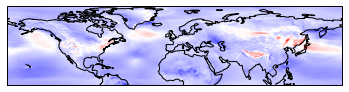

In [25]:
#tmp = d.tauu.sel(lon=(d.lon > 250.) | (d.lon < 40.))
#tmp = d.tauu.sel(lat=slice(0, 85))
#tmp.isel(time=0).plot()

ax = plt.axes(projection=ccrs.PlateCarree())

ax.pcolor(d.lon, d.lat.sel(lat=slice(0, 85)), d.tauu.sel(lat=slice(0, 85)).isel(time=0), transform=ccrs.PlateCarree(), 
         cmap = 'bwr')

ax.coastlines()

plt.show()

In [27]:
ds_rolled = d.roll(lon=(d.dims['lon'] // 2))
print(ds_rolled.tauu)

<xarray.DataArray 'tauu' (time: 125, lat: 324, lon: 432)>
dask.array<shape=(125, 324, 432), dtype=float32, chunksize=(2, 324, 432)>
Coordinates:
  * lat      (lat) float64 -89.72 -89.17 -88.61 -88.06 ... 88.61 89.17 89.72
  * lon      (lon) float64 180.0 180.8 181.7 182.5 ... 176.7 177.5 178.3 179.2
  * time     (time) object 2008-11-16 00:00:00 ... 2019-03-16 00:00:00
Attributes:
    standard_name:  surface_downward_eastward_stress
    long_name:      Surface Downward Eastward Wind Stress
    comment:        mo: This variable includes a contribution from the turbul...
    units:          Pa
    original_name:  mo: (stash: m01s03i460, lbproc: 128)
    cell_methods:   area: time: mean
    cell_measures:  area: areacella


/opt/jaspy/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  """Entry point for launching an IPython kernel.


ValueError: The input coordinate is not sorted in increasing order along axis 0. This can lead to unexpected results. Consider calling the `sortby` method on the input DataArray. To plot data with categorical axes, consider using the `heatmap` function from the `seaborn` statistical plotting library.

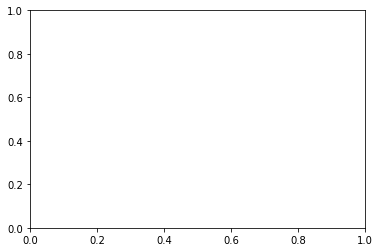

In [24]:
ds_rolled.tauu.isel(time=0).plot()

In [37]:
ppdir="/badc/cmip6/data/CMIP6/DCPP/MOHC/HadGEM3-GC31-MM/dcppA-hindcast/"

var="s2008-r1i1p1f2/Amon/tauv/gn/files/d20200417/"

d = xr.open_mfdataset(ppdir + var + "*.nc")

print(d)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 325, lon: 432, time: 125)
Coordinates:
  * lat        (lat) float64 -90.0 -89.44 -88.89 -88.33 ... 88.89 89.44 90.0
  * lon        (lon) float64 0.4167 1.25 2.083 2.917 ... 357.1 357.9 358.7 359.6
  * time       (time) object 2008-11-16 00:00:00 ... 2019-03-16 00:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) float64 dask.array<shape=(125, 2), chunksize=(2, 2)>
    lat_bnds   (time, lat, bnds) float64 dask.array<shape=(125, 325, 2), chunksize=(2, 325, 2)>
    lon_bnds   (time, lon, bnds) float64 dask.array<shape=(125, 432, 2), chunksize=(2, 432, 2)>
    tauv       (time, lat, lon) float32 dask.array<shape=(125, 325, 432), chunksize=(2, 325, 432)>
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            DCPP
    branch_method:          no parent
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2020-11-11T14:12:43Z
    cv_version:   

In [41]:
ppdir="/badc/cmip6/data/CMIP6/DCPP/MOHC/HadGEM3-GC31-MM/dcppA-hindcast/"

var="s2008-r1i1p1f2/Amon/psl/gn/files/d20200417/"

d = xr.open_mfdataset(ppdir + var + "*.nc")

var="s2008-r1i1p1f2/Amon/ps/gn/files/d20200417/"

d1 = xr.open_mfdataset(ppdir + var + "*.nc")

print(d)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 324, lon: 432, time: 125)
Coordinates:
  * lat        (lat) float64 -89.72 -89.17 -88.61 -88.06 ... 88.61 89.17 89.72
  * lon        (lon) float64 0.4167 1.25 2.083 2.917 ... 357.1 357.9 358.7 359.6
  * time       (time) object 2008-11-16 00:00:00 ... 2019-03-16 00:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) float64 dask.array<shape=(125, 2), chunksize=(2, 2)>
    lat_bnds   (time, lat, bnds) float64 dask.array<shape=(125, 324, 2), chunksize=(2, 324, 2)>
    lon_bnds   (time, lon, bnds) float64 dask.array<shape=(125, 432, 2), chunksize=(2, 432, 2)>
    psl        (time, lat, lon) float32 dask.array<shape=(125, 324, 432), chunksize=(2, 324, 432)>
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            DCPP
    branch_method:          no parent
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2020-05-28T15:22:06Z
    cv_version: 

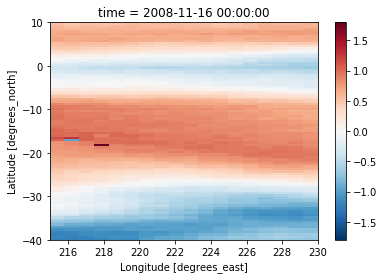

In [46]:
(d.psl.isel(time=0) - d1.ps.isel(time=0)).sel(lat=slice(-40, 10), lon=slice(215,230)).plot()